In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

C:\Users\jakub\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Wczytywanie danych
df_titanic = sns.load_dataset('titanic')
df_titanic = df_titanic.drop(columns = ['embark_town', 'deck']) # usuwanie powtórzonej kolumny i prawie pustej
# Dokumentacja : https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets/input
df_fraud = pd.read_csv("../input/credit_fraud/creditcard.csv")
# Dokumentacja : https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/data
df_heart = pd.read_csv('../input/heart_disease/heart.csv')

In [4]:
# Eksploracja danych - funkcja
def explore_data(df, name):
    print(f'\n{name} Dataset:\n')
    print(df.info())
    print(df.describe())
    print(df.isnull().sum())
    print(df.head())
    
    


## Eksploracja danych titanic

In [5]:
# Eksploracja zbiorów danych
explore_data(df_titanic, 'titanic')


titanic Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None
         survived      pclass         age       sibsp  

In [6]:
df_titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

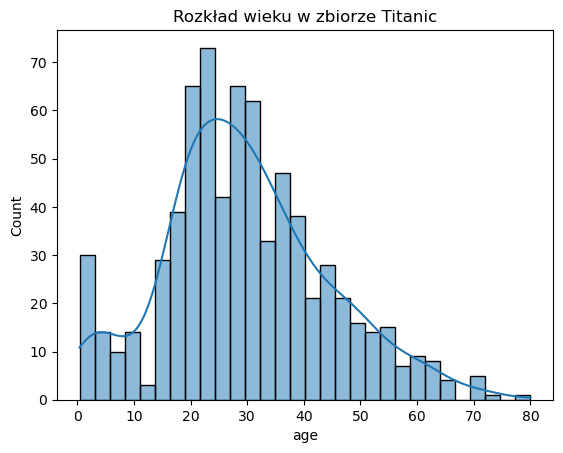

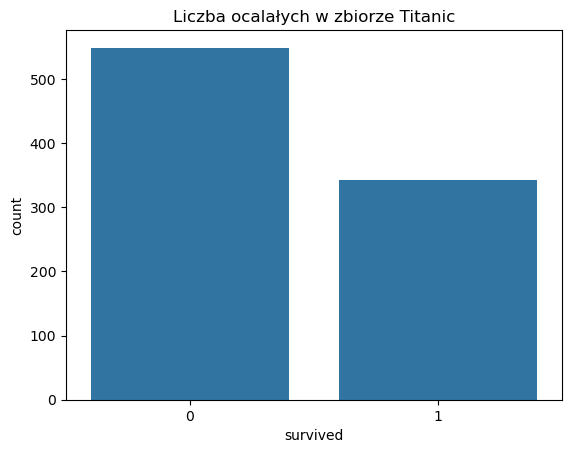

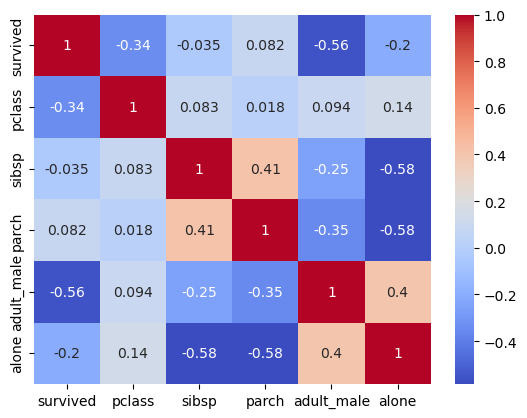

In [7]:
sns.histplot(df_titanic['age'].dropna(), bins=30, kde=True)
plt.title('Rozkład wieku w zbiorze Titanic')
plt.show()

sns.countplot(x='survived', data=df_titanic)
plt.title('Liczba ocalałych w zbiorze Titanic')
plt.show()

sns.heatmap(df_titanic.loc[:, df_titanic.dtypes.isin(['int64', 'float64', 'bool'])].corr(), annot=True, cmap='coolwarm')
plt.show()

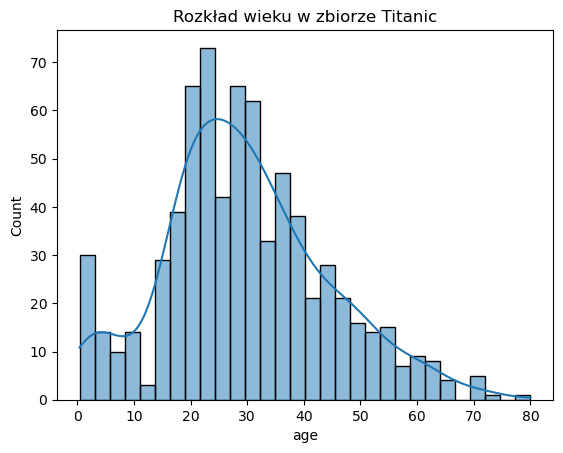

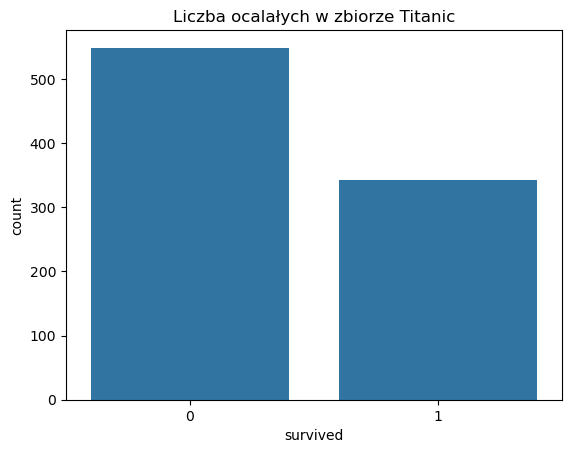

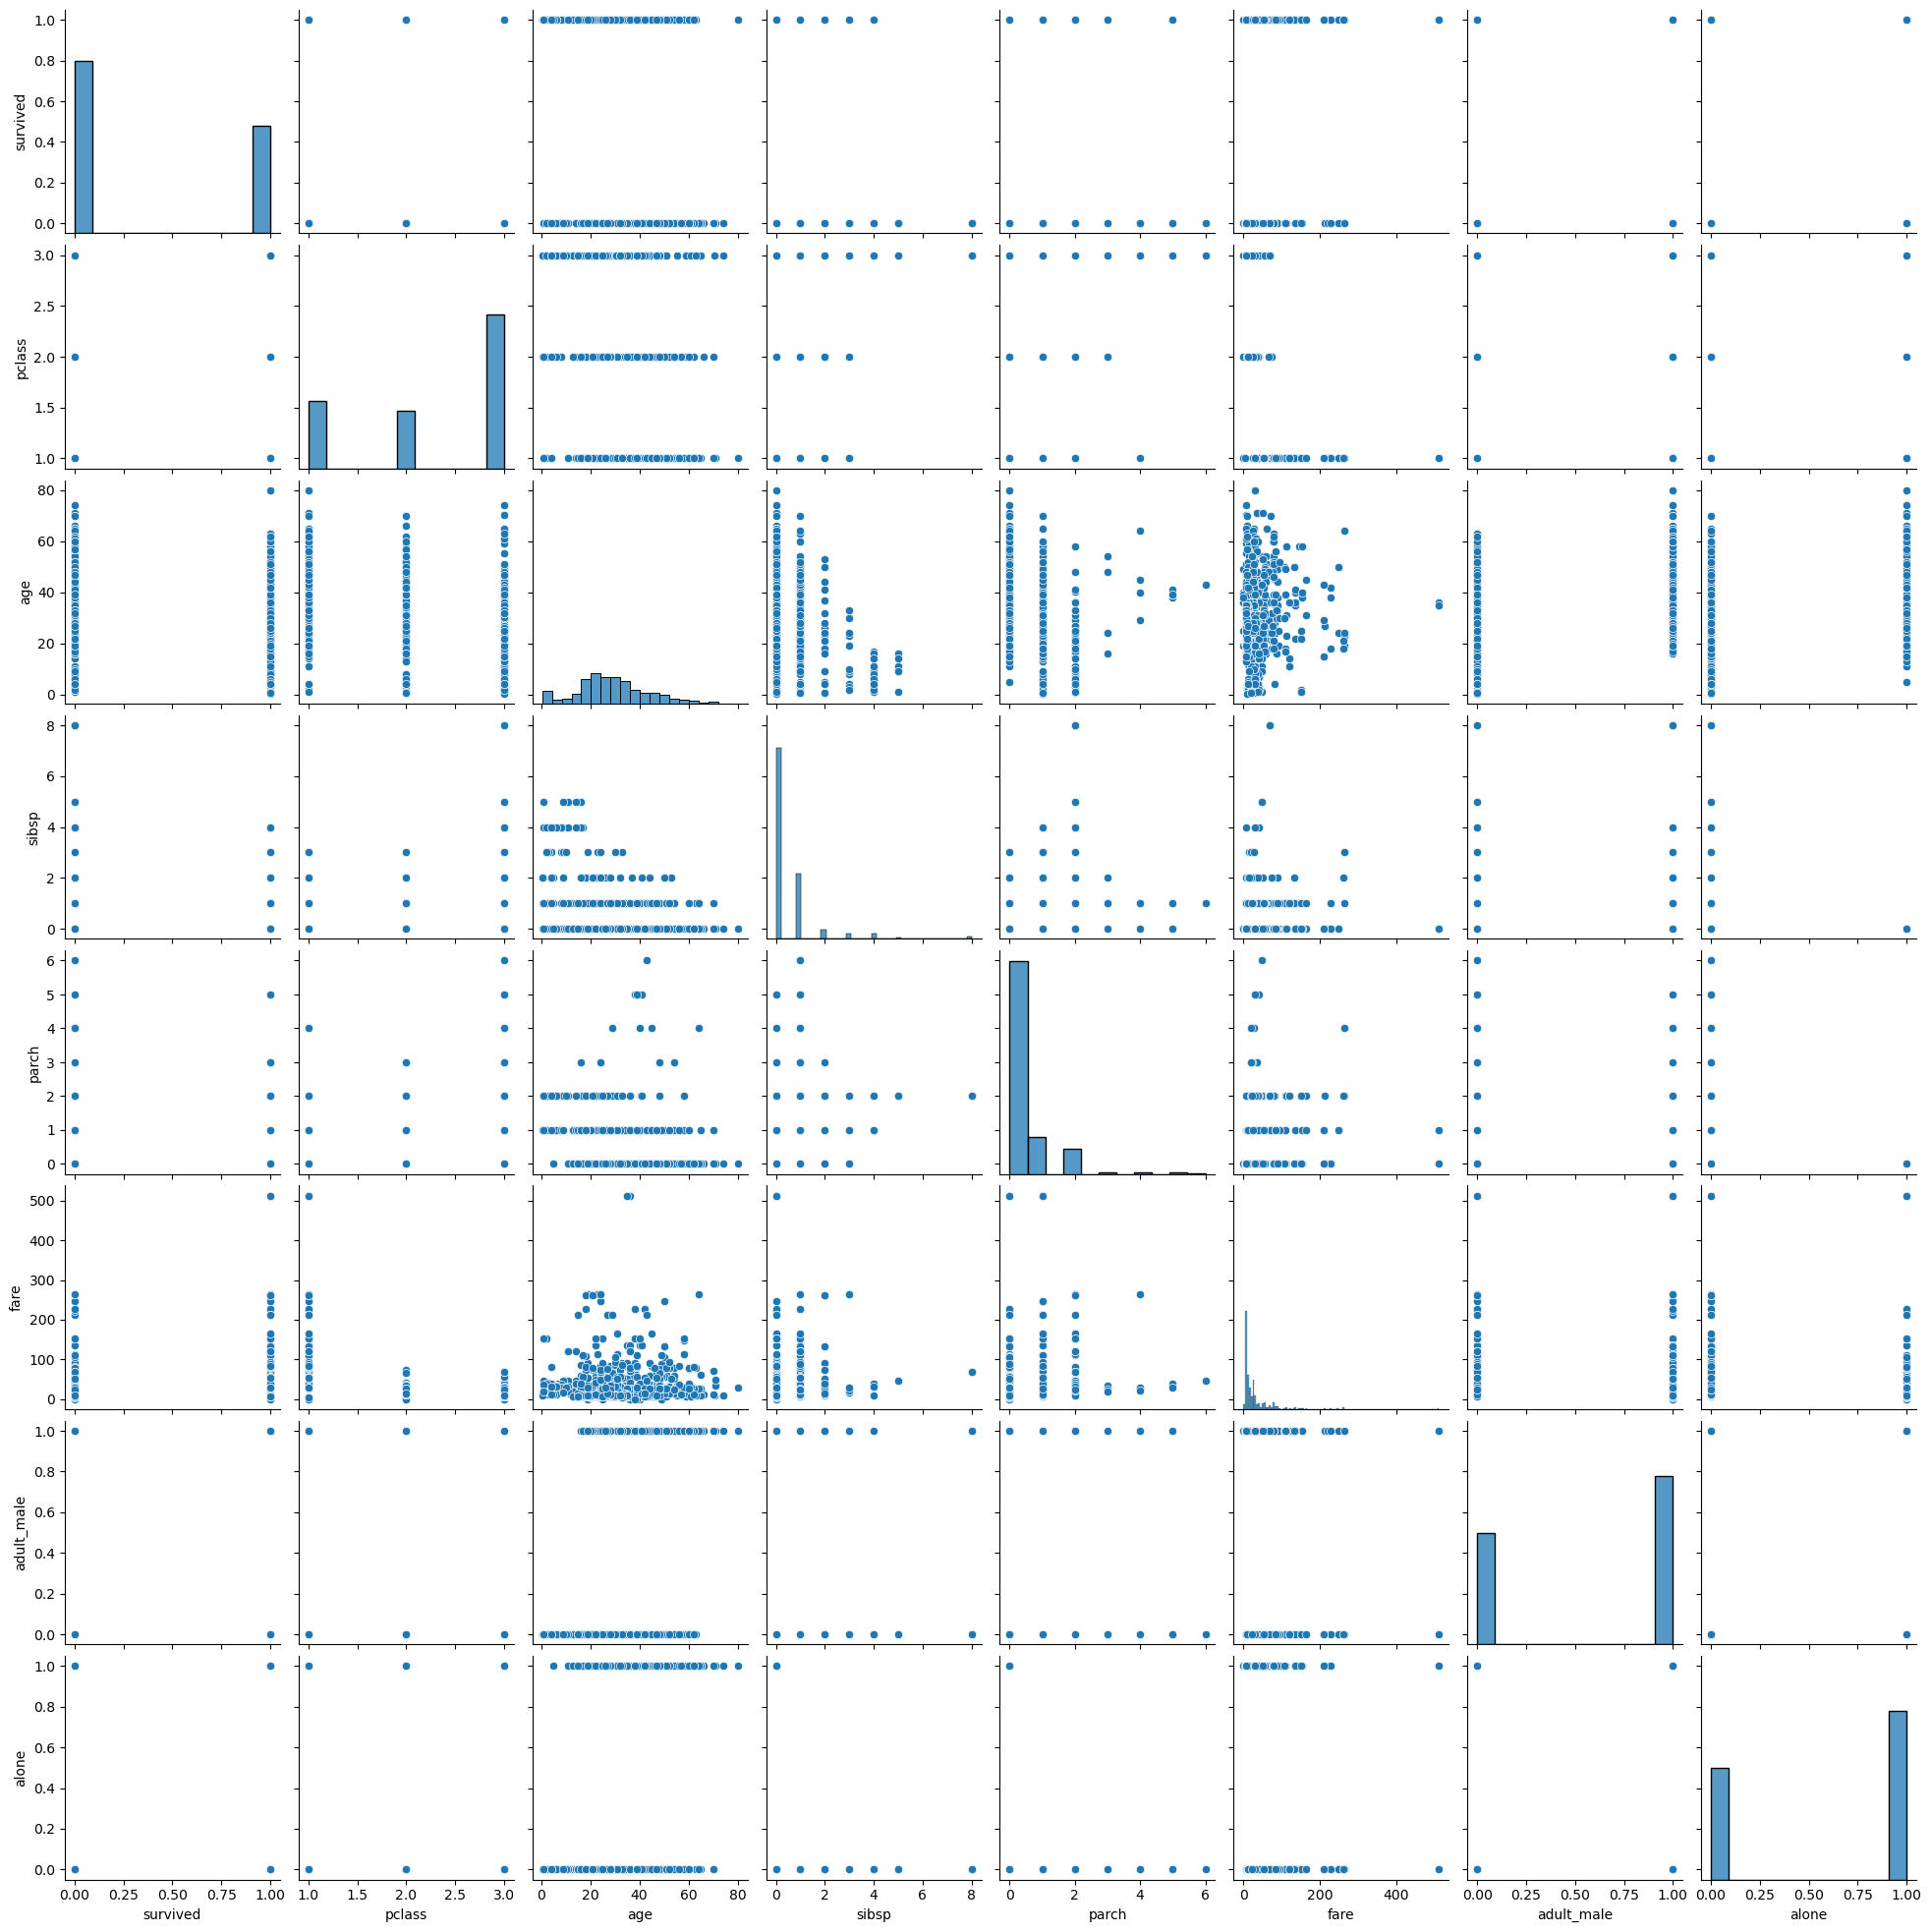

In [9]:
sns.histplot(df_titanic['age'].dropna(), bins=30, kde=True)
plt.title('Rozkład wieku w zbiorze Titanic')
plt.show()

sns.countplot(x='survived', data=df_titanic)
plt.title('Liczba ocalałych w zbiorze Titanic')
plt.show()

sns.pairplot(df_titanic.loc[:, df_titanic.dtypes != 'object'])
plt.show()

### Ćwiczenie:
Wypełnij puste dane w zbiorze `df_titanic`

In [18]:
df_titanic['age'] = df_titanic['age'].fillna(df_titanic['age'].mean())

df_titanic['embarked'] = df_titanic['embarked'].fillna('S')

df_titanic.loc[:,df_titanic.isna().any()]
#df_titanic['deck'].isna().mean()
#df_titanic = df_titanic.drop(columns = ['deck'])


## Eksploracja danych Credit card

In [19]:
explore_data(df_fraud, 'Fraud')


Fraud Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    100000 non-null  float64
 1   V1      100000 non-null  float64
 2   V2      100000 non-null  float64
 3   V3      100000 non-null  float64
 4   V4      100000 non-null  float64
 5   V5      100000 non-null  float64
 6   V6      100000 non-null  float64
 7   V7      100000 non-null  float64
 8   V8      100000 non-null  float64
 9   V9      100000 non-null  float64
 10  V10     100000 non-null  float64
 11  V11     100000 non-null  float64
 12  V12     100000 non-null  float64
 13  V13     100000 non-null  float64
 14  V14     100000 non-null  float64
 15  V15     100000 non-null  float64
 16  V16     100000 non-null  float64
 17  V17     100000 non-null  float64
 18  V18     100000 non-null  float64
 19  V19     100000 non-null  float64
 20  V20     100000 non-null  float64

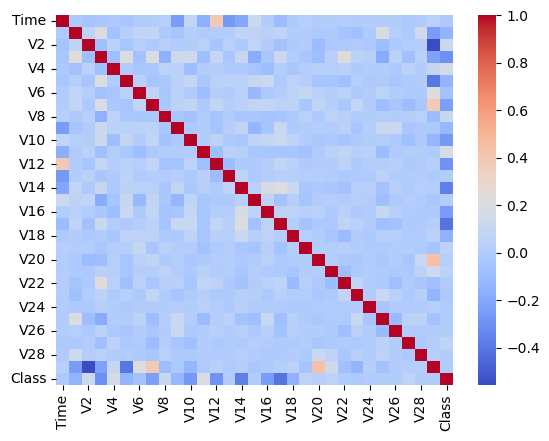

In [20]:
sns.heatmap(df_fraud.corr(), cmap='coolwarm')
plt.show()

In [21]:
df_fraud.corr().iloc[30]

Time     -0.015959
V1       -0.146549
V2        0.118395
V3       -0.306703
V4        0.166203
V5       -0.142985
V6       -0.068308
V7       -0.240844
V8        0.104108
V9       -0.119891
V10      -0.270631
V11       0.185601
V12      -0.296583
V13      -0.000782
V14      -0.373653
V15       0.002282
V16      -0.252848
V17      -0.413777
V18      -0.160144
V19       0.047277
V20       0.019040
V21       0.049099
V22      -0.001042
V23      -0.016656
V24      -0.009128
V25       0.007828
V26       0.007666
V27       0.062665
V28       0.005399
Amount    0.003253
Class     1.000000
Name: Class, dtype: float64

### Ćwiczenie:
Wykonaj Eksplorację danych `df_heart`


Heart Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   1

<Axes: >

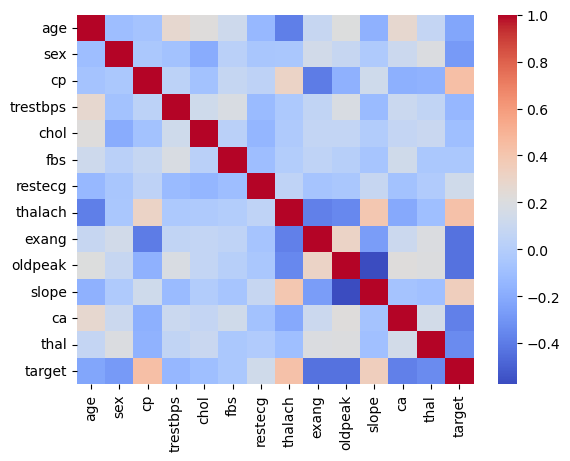

In [23]:
explore_data(df_heart, 'Heart')

sns.heatmap(df_heart.corr(), cmap='coolwarm')

## Przygotowanie danych do modelowania


In [50]:
def split_based_on_time(X, y, time_col, test_size):
    interval = X[time_col].quantile(1-test_size)
    return X[X[time_col]<=interval].drop(columns = time_col), X[X[time_col]>interval].drop(columns = time_col), y[X[time_col]<=interval], y[X[time_col]>interval]

X_titanic = pd.get_dummies(df_titanic.drop(columns=['survived', 'alive']))
y_titanic = df_titanic['survived']

X_fraud = df_fraud.drop(columns=['Class'])
y_fraud = df_fraud['Class']

X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(X_titanic, y_titanic, test_size = 0.2, random_state = 42)
X_train_fraud, X_test_fraud, y_train_fraud, y_test_fraud = split_based_on_time(X_fraud, y_fraud, time_col = 'Time', test_size = 0.2)

### Ćwiczenie:
Podziel zbiór Heart Disease


In [51]:
X_heart = df_heart.drop(columns = 'target')
y_heart = df_heart['target']
X_train_heart, X_test_heart, y_train_heart, y_test_heart= train_test_split(X_heart, y_heart, test_size=0.2, random_state=42)

## Modelowanie

In [58]:
y_prob_test_titanic

array([0.07373475, 0.19845558, 0.08423348, 0.90729709, 0.79143934,
       0.93333986, 0.69063609, 0.04901718, 0.71198426, 0.8922338 ,
       0.31975556, 0.07147402, 0.29251854, 0.1131928 , 0.19418631,
       0.93043552, 0.31124181, 0.69070479, 0.20488165, 0.32500082,
       0.08195661, 0.32355934, 0.65086722, 0.08464149, 0.0807905 ,
       0.20832941, 0.40794528, 0.20007501, 0.21578949, 0.65394989,
       0.0848001 , 0.66885262, 0.42953927, 0.6558587 , 0.08542834,
       0.10815221, 0.34153159, 0.69063609, 0.94374855, 0.07882163,
       0.15243668, 0.07178355, 0.07886709, 0.09098488, 0.7318301 ,
       0.02754266, 0.08488285, 0.08292774, 0.08169863, 0.37211198,
       0.61825695, 0.88060779, 0.01517166, 0.85846262, 0.071467  ,
       0.91196471, 0.19727447, 0.97314806, 0.84834109, 0.70749314,
       0.08361453, 0.8979059 , 0.84437468, 0.3300424 , 0.09098488,
       0.81984559, 0.25620444, 0.07919406, 0.07807974, 0.93964772,
       0.78616642, 0.916117  , 0.43560268, 0.92113363, 0.08250


Titanic Performance:
Accuracy: 0.8101
Precision: 0.7941
Recall: 0.7297
F1 Score: 0.7606
ROC AUC Score: 0.8757


C:\Users\jakub\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


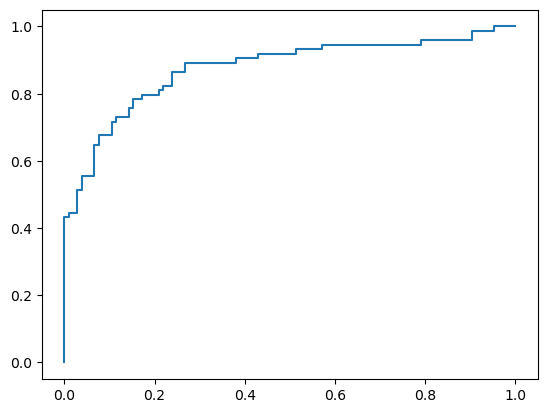

In [52]:
# Titanic
model = LogisticRegression()
model.fit(X_train_titanic, y_train_titanic)


y_pred_test_titanic = model.predict(X_test_titanic)
y_prob_test_titanic = model.predict_proba(X_test_titanic)[:, 1]
fpr, tpr, _ = roc_curve(y_test_titanic, y_prob_test_titanic)

print(f"\nTitanic Performance:")
print(f"Accuracy: {accuracy_score(y_test_titanic, y_pred_test_titanic):.4f}")
print(f"Precision: {precision_score(y_test_titanic, y_pred_test_titanic):.4f}")
print(f"Recall: {recall_score(y_test_titanic, y_pred_test_titanic):.4f}")
print(f"F1 Score: {f1_score(y_test_titanic, y_pred_test_titanic):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test_titanic, y_prob_test_titanic):.4f}")

plt.plot(fpr, tpr, label=f'Titanic (AUC = {roc_auc_score(y_test_titanic, y_prob_test_titanic):.4f}')

In [59]:
pd.DataFrame({'coefficients' : model.coef_[0]}, index = X_train_titanic.columns).sort_values('coefficients')

,coefficients
who_man,-0.968977
adult_male,-0.968977
class_Third,-0.587603
sibsp,-0.546931
alone,-0.444035
parch,-0.404058
pclass,-0.091619
age,-0.007442
fare,0.004060
embarked_S,0.046309


## Undersampling / Oversampling

In [61]:
df_titanic['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [63]:
# Undersampling / Oversampling
def oversampling_balance_data(df, target_col):
    major_index = df[target_col].value_counts().index[0]
    majority = df[df[target_col] == major_index]
    minority = df[df[target_col] != major_index]
    minoroty_resampled = minority.sample(n = majority.shape[0], replace = True, random_state = 42)
    return pd.concat([majority, minoroty_resampled])


df_titanic_oversampled = oversampling_balance_data(df_titanic, 'survived')

### Ćwiczenie:
Napisz funkcję do undersamplingu.

In [73]:
def undersampling_balance_data(df, target_col):
    major_index = df[target_col].value_counts().index[0]
    majority = df[df[target_col] == major_index]
    minority = df[df[target_col] != major_index]
    majority_resampled = majority.sample(n = minority.shape[0], replace = False, random_state = 42)
    return pd.concat([minority, majority_resampled])


df_titanic_undersampled = undersampling_balance_data(df_titanic, 'survived')

In [74]:
df_titanic_undersampled['survived'].value_counts()

survived
1    342
0    342
Name: count, dtype: int64

### Ćwiczenie:
Sprawdź wyniki po nałożeniu oversamplingu

In [77]:
def train_and_evaluate_log_reg(X_train, X_test, y_train, y_test, name):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    
    print(f"\n{name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob):.4f}")
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_prob):.4f}')
    return model

C:\Users\jakub\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Titanic Performance:
Accuracy: 0.8000
Precision: 0.7938
Recall: 0.7624
F1 Score: 0.7778
ROC AUC Score: 0.8411


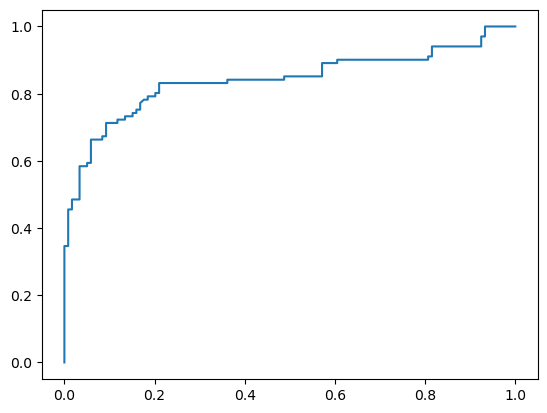

In [76]:
df_titanic_oversampled

X_titanic = pd.get_dummies(df_titanic_oversampled.drop(columns=['survived', 'alive']))
y_titanic = df_titanic_oversampled['survived']

X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(X_titanic, y_titanic, test_size = 0.2, random_state = 42)

train_and_evaluate_log_reg(X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic, 'Titanic')

## Dodanie nowych cech

In [80]:
# Titanic
df_titanic['FamilySize'] = df_titanic['sibsp'] + df_titanic['parch']

df_heart['Cholesterol_BP_Ratio'] = df_heart['chol'] / df_heart['trestbps']



### Ćwiczenie:
Sprawdź czy wyniki się zmienią po dodaniu nowych cech



Titanic Performance:
Accuracy: 0.8101
Precision: 0.7941
Recall: 0.7297
F1 Score: 0.7606
ROC AUC Score: 0.8746


C:\Users\jakub\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

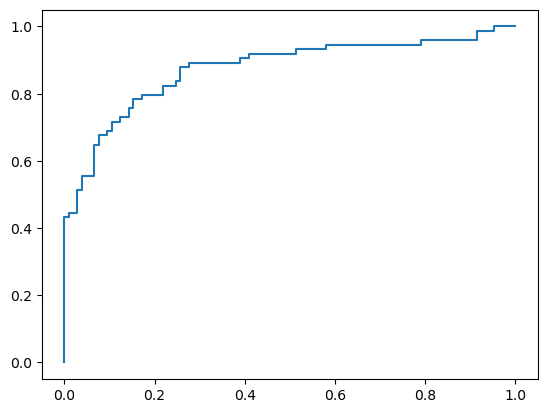

In [83]:
df_titanic_oversampled

X_titanic = pd.get_dummies(df_titanic.drop(columns=['survived', 'alive']))
y_titanic = df_titanic['survived']

X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(X_titanic, y_titanic, test_size = 0.2, random_state = 42)

train_and_evaluate_log_reg(X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic, 'Titanic')

### Ćwiczenie
Sprawdź dla pozostałych zbiorów

In [ ]:
X_train_fraud, X_test_fraud, y_train_fraud, y_test_fraud 
X_train_heart, X_test_heart, y_train_heart, y_test_heart


Fraud Performance:
Accuracy: 0.9989
Precision: 1.0000
Recall: 0.1852
F1 Score: 0.3125
ROC AUC Score: 0.9428


C:\Users\jakub\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

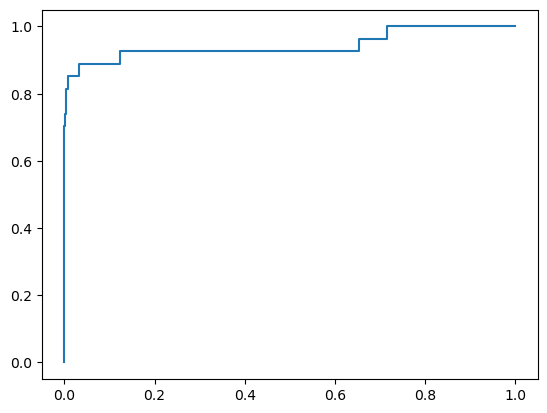

In [87]:
model_fraud = train_and_evaluate_log_reg(X_train_fraud, X_test_fraud, y_train_fraud, y_test_fraud , 'Fraud')


In [96]:
pd.DataFrame({'predykcje': model_fraud.predict_proba(X_test_fraud)[:,1]>0.1, 'realizacje': y_test_fraud} ).value_counts()

predykcje  realizacje
False      0             19972
           1                14
True       1                13
Name: count, dtype: int64

C:\Users\jakub\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Fraud Performance:
Accuracy: 0.9519
Precision: 0.9649
Recall: 0.9165
F1 Score: 0.9401
ROC AUC Score: 0.9550


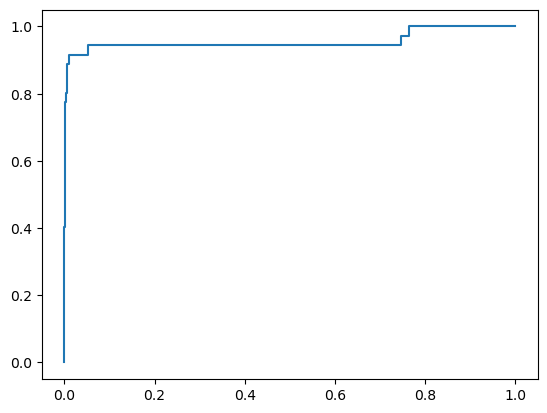

In [101]:
#oversampling 
df_fraud_oversamp = oversampling_balance_data(df_fraud, 'Class')
X_fraud = df_fraud_oversamp.drop(columns=['Class'])
y_fraud = df_fraud_oversamp['Class']

X_train_fraud, X_test_fraud, y_train_fraud, y_test_fraud = split_based_on_time(X_fraud, y_fraud, time_col = 'Time', test_size = 0.2)


model_fraud = train_and_evaluate_log_reg(X_train_fraud, X_test_fraud, y_train_fraud, y_test_fraud , 'Fraud')


## Decision Tree modelowanie

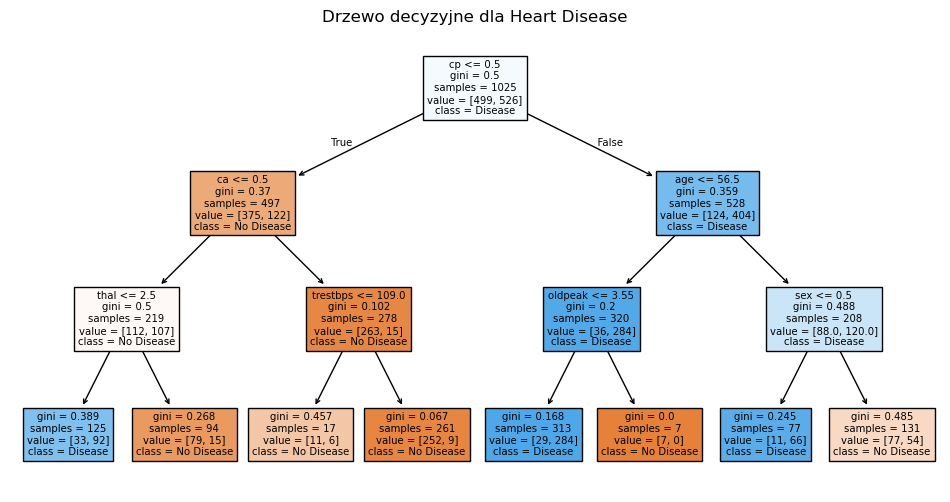

In [102]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_heart, y_heart)
plt.figure(figsize=(12, 6))
plot_tree(dt, filled=True, feature_names=df_heart.drop(columns=['target']).columns, class_names=['No Disease', 'Disease'])
plt.title('Drzewo decyzyjne dla Heart Disease')
plt.show()


## Ćwiczenie:
Sprawdź dla pozostałych zbiorów

In [111]:
X_train_titanic

,pclass,age,sibsp,parch,fare,adult_male,alone,FamilySize,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third,who_child,who_man,who_woman
331,1,45.500000,0,0,28.5000,True,True,0,False,True,False,False,True,True,False,False,False,True,False
733,2,23.000000,0,0,13.0000,True,True,0,False,True,False,False,True,False,True,False,False,True,False
382,3,32.000000,0,0,7.9250,True,True,0,False,True,False,False,True,False,False,True,False,True,False
704,3,26.000000,1,0,7.8542,True,False,1,False,True,False,False,True,False,False,True,False,True,False
813,3,6.000000,4,2,31.2750,False,False,6,True,False,False,False,True,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,3,21.000000,0,0,7.6500,False,True,0,True,False,False,False,True,False,False,True,False,False,True
270,1,29.699118,0,0,31.0000,True,True,0,False,True,False,False,True,True,False,False,False,True,False
860,3,41.000000,2,0,14.1083,True,False,2,False,True,False,False,True,False,False,True,False,True,False
435,1,14.000000,1,2,120.0000,False,False,3,True,False,False,False,True,True,False,False,True,False,False


In [110]:
X_test_titanic

,pclass,age,sibsp,parch,fare,adult_male,alone,FamilySize,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third,who_child,who_man,who_woman
709,3,29.699118,1,1,15.2458,True,False,2,False,True,True,False,False,False,False,True,False,True,False
439,2,31.000000,0,0,10.5000,True,True,0,False,True,False,False,True,False,True,False,False,True,False
840,3,20.000000,0,0,7.9250,True,True,0,False,True,False,False,True,False,False,True,False,True,False
720,2,6.000000,0,1,33.0000,False,False,1,True,False,False,False,True,False,True,False,True,False,False
39,3,14.000000,1,0,11.2417,False,False,1,True,False,True,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,3,17.000000,0,0,7.1250,True,True,0,False,True,False,False,True,False,False,True,False,True,False
773,3,29.699118,0,0,7.2250,True,True,0,False,True,True,False,False,False,False,True,False,True,False
25,3,38.000000,1,5,31.3875,False,False,6,True,False,False,False,True,False,False,True,False,False,True
84,2,17.000000,0,0,10.5000,False,True,0,True,False,False,False,True,False,True,False,False,False,True


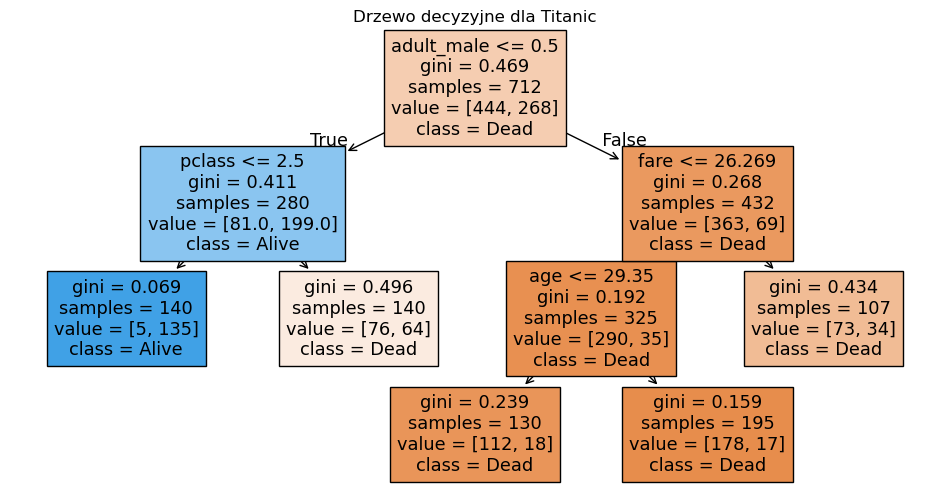


 Performance:
Accuracy: 0.7765
Precision: 0.9048
Recall: 0.5135
F1 Score: 0.6552
ROC AUC Score: 0.8554


In [113]:
dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=100,  random_state=42)
dt.fit(X_train_titanic, y_train_titanic)
y_pred = dt.predict(X_test_titanic)
y_prob = dt.predict_proba(X_test_titanic)[:, 1]
fpr, tpr, _ = roc_curve(y_test_titanic, y_prob)


plt.figure(figsize=(12, 6))
plot_tree(dt, filled=True, feature_names=X_train_titanic.columns, class_names=['Dead', 'Alive'])
plt.title('Drzewo decyzyjne dla Titanic')
plt.show()


print(f"\n Performance:")
print(f"Accuracy: {accuracy_score(y_test_titanic, y_pred):.4f}")
print(f"Precision: {precision_score(y_test_titanic, y_pred):.4f}")
print(f"Recall: {recall_score(y_test_titanic, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test_titanic, y_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test_titanic, y_prob):.4f}")

## Random Forest


 Performance:
Accuracy: 0.8101
Precision: 0.8030
Recall: 0.7162
F1 Score: 0.7571
ROC AUC Score: 0.8701


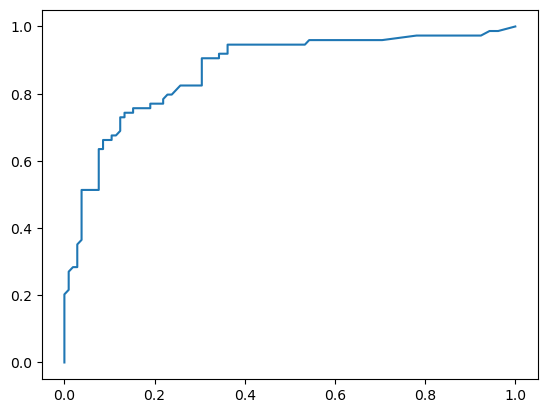

In [114]:
model = RandomForestClassifier(random_state=42, n_estimators = 50, max_depth=3, min_samples_leaf=10)
model.fit(X_train_titanic, y_train_titanic)
y_pred = model.predict(X_test_titanic)
y_prob = model.predict_proba(X_test_titanic)[:, 1]
fpr, tpr, _ = roc_curve(y_test_titanic, y_prob)

name = 'Titanic'
print(f"\n Performance:")
print(f"Accuracy: {accuracy_score(y_test_titanic, y_pred):.4f}")
print(f"Precision: {precision_score(y_test_titanic, y_pred):.4f}")
print(f"Recall: {recall_score(y_test_titanic, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test_titanic, y_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test_titanic, y_prob):.4f}")

plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test_titanic, y_prob):.4f}')

In [116]:
### Feature importance
parameters = pd.DataFrame({'importances': model.feature_importances_}, index = X_train_titanic.columns).sort_values('importances', ascending = False)

### Ćwiczenie:
Sprawdź regresję logistyczną z najlepszymi parametrami z RandomForest


Titanic Performance:
Accuracy: 0.7933
Precision: 0.7606
Recall: 0.7297
F1 Score: 0.7448
ROC AUC Score: 0.8623


LogisticRegression()

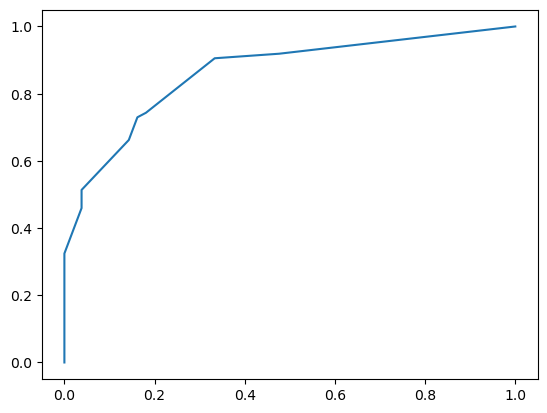

In [122]:
best_parameters = parameters[parameters['importances']> 0.05].index

X_titanic[best_parameters]

X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(X_titanic[best_parameters], y_titanic, test_size = 0.2, random_state = 42)

train_and_evaluate_log_reg(X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic, 'Titanic')

## Tuning Hiperparametrów

In [126]:
param_grid_rf = {
    'n_estimators': [10,20,50],
    'max_depth': [2,5,10],
    'min_samples_split': [10, 50, 100],
    #'min_samples_leaf': [1, 2, 4]
}

In [127]:
rf = RandomForestClassifier(random_state=42)
grid_titanic = GridSearchCV(rf, param_grid_rf, cv=3)
grid_titanic.fit(X_titanic, y_titanic)
print("Najlepsze parametry dla Titanic:", grid_titanic.best_params_)

#grid_fraud = GridSearchCV(rf, param_grid_rf, cv=3)
#grid_fraud.fit(X_fraud, y_fraud)
#print("Najlepsze parametry dla Fraud:", grid_fraud.best_params_)

#grid_heart = GridSearchCV(rf, param_grid_rf, cv=3)
#grid_heart.fit(X_heart, y_heart)
#print("Najlepsze parametry dla Heart Disease:", grid_heart.best_params_)

Najlepsze parametry dla Titanic: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}


### Ćwiczenie:
Sprawdź wyniki z najlepszymi parametrami

In [128]:
# Modelowanie i ocena modeli
def train_and_evaluate(X_train, X_test, y_train, y_test, name, best_params):
    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    
    print(f"\n{name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob):.4f}")
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_prob):.4f}')


titanic Performance:
Accuracy: 0.7765
Precision: 0.9048
Recall: 0.5135
F1 Score: 0.6552
ROC AUC Score: 0.8689


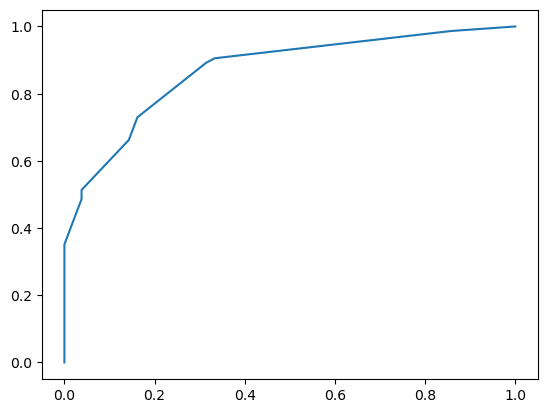

In [130]:
train_and_evaluate(X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic, 'titanic',   {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50})